In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/drive/MyDrive/422 project/Heart_Disease_Prediction (1).csv")


In [ ]:
dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
dataset.shape

(270, 14)

In [ ]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
#any null value
dataset.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:

dataset_dup=dataset.duplicated().any()
dataset_dup


False

Training data

In [ ]:

X=dataset.drop('Heart Disease',axis=1) 
y=dataset['Heart Disease']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

                                                     

Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Accuracy without Scaling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))


Test set accuracy: 0.65


Accuracy using Min-Max Scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#train
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    knn.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.82


Encoding Catagorical Feature

In [ ]:
dataset['Heart Disease'].unique()


array(['Presence', 'Absence'], dtype=object)

In [ ]:
catagory_encoding=pd.get_dummies(dataset['Heart Disease'])
catagory_encoding.head()

,Absence,Presence
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=1)

dtc.fit(X_train,y_train)
y_prediction3=dtc.predict(X_test)
from sklearn.metrics import accuracy_score
Score1=accuracy_score(y_test,y_prediction3)
print(Score1)


0.7058823529411765


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rtc=RandomForestClassifier(n_estimators=20,random_state=1)
rtc.fit(X_train,y_train)
y_prediction4=rtc.predict(X_test)
Score5=accuracy_score(y_test,y_prediction4)
print(Score5)


0.7941176470588235


In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
y_prediction1=log.predict(X_test)

from sklearn.metrics import accuracy_score
Score2=accuracy_score(y_test,y_prediction1)
print(Score2)




0.8382352941176471


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_prediction1=log.predict(X_test)
Score3=accuracy_score(y_test,y_prediction1)
print(Score3)



0.8382352941176471


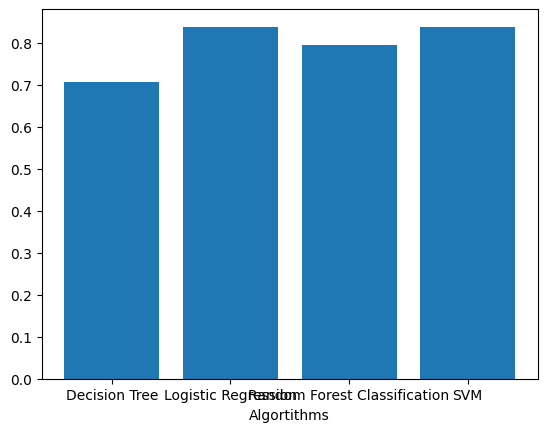

In [ ]:
Algorithm=['Decision Tree','Logistic Regression','Random Forest Classification','SVM']
Range=[Score1,Score2,Score5,Score3]
plt.bar(Algorithm, Range)
plt.xlabel('Algortithms')
plt.show()

In [ ]:

X=dataset.drop('Heart Disease',axis=1)
y=dataset['Heart Disease']



In [ ]:

from sklearn.linear_model import LogisticRegression
rf=LogisticRegression()
rf.fit(X,y)
new_data = pd.DataFrame({'Age':57,'Sex':1,'Chest pain type':2,'BP':124,'Cholesterol':261,'FBS over 120':0,'EKG results':0,'Max HR':141,'Exercise angina':0,'ST depression':0.3,'Slope of ST':1,'Number of vessels fluro':0,'Thallium':7},index=[0])


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
new_data
p=rf.predict(new_data)
if p[0]==0:
  print("Absence")
else:
  print("Presence")

Presence


In [ ]:
X=dataset.drop('Heart Disease',axis=1)
y=dataset['Heart Disease']
from sklearn.svm import SVC
rf=LogisticRegression()
rf.fit(X,y)
new_data = pd.DataFrame({'Age':57,'Sex':1,'Chest pain type':2,'BP':124,'Cholesterol':261,'FBS over 120':0,'EKG results':0,'Max HR':141,'Exercise angina':0,'ST depression':0.3,'Slope of ST':1,'Number of vessels fluro':0,'Thallium':7},index=[0])



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
new_data
p=rf.predict(new_data)
if p[0]==0:
  print("Absence")
else:
  print("Presence")

Presence
